# Filtering EEG Data

## Install MNE Library

In [1]:
# install MNE library
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 61.1 MB/s eta 0:00:00


## Import EEG Data Files

In [2]:
# import EEG data files
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14.vhdr
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14.eeg
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14.vmrk

--2026-01-01 11:36:55--  https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14.vhdr
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3948 (3.9K) [application/octet-stream]
Saving to: ‘N400_dataset_14.vhdr’

N400_dataset_14.vhd 100%[===================>]   3.86K  --.-KB/s    in 0s      

2026-01-01 11:36:57 (61.2 MB/s) - ‘N400_dataset_14.vhdr’ saved [3948/3948]

--2026-01-01 11:36:57--  https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14.eeg
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39926400 (38M) [application/octet-stream]
Saving to: ‘N400_dataset_14.eeg’

N400_dataset_14.eeg 100%[=====

## Import Libraries

In [3]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt

## Import Raw Data

In [6]:
# read EEG raw data
raw = mne.io.read_raw_brainvision('N400_dataset_14.vhdr', preload='True')

# set the esaycap montage to raw data
raw.set_montage('easycap-M1', on_missing='ignore')


<RawBrainVision | N400_dataset_14.eeg, 16 x 623850 (1247.7 s), ~76.2 MiB, data loaded>

## Power Spectral Density

Power Spectral Density (PSD) describes how a signal's power is distributed across different frequencies, revealing its frequency content, unlike time-domain analysis that shows changes over time.

*Power* refers to the amplitude of sine waves when we are working in the frequency domain, *spectrum* refers to a range of frequencies, and *density* quantifies the power over a range of frequencies.

The unit for EEG Power Spectral Density (PSD) is typically **µV²/Hz** (microvolts squared per Hertz), representing the power (amplitude squared) of the EEG signal distributed across different frequencies (per Hz).

The unit **µV²/Hz** is often converted to the decibel (dB) scale, such as **dB/Hz**.

Logarithmic Conversion (dB):<br>
Formula: $dB=10 \log _{10}(PSD\text{ in }\mu V^{2}/Hz)$

Computing the PSD involves applying a mathematical methode called the Fast Fourier Transform.

In a sense, you can think of a PSD as a histogram of frequency information — frequency is a continuous variable that is divided into bins (bin size is determined automatically), and the amount of power is plotted for each frequency bin.

## Plot the Frequency Spectrum of the Raw Data

### Computing the Power Spectral Density

The **`compute_psd()`** method computes the power spectral density (PSD) of a data set.

The figure below shows the PSD for the raw data.

The x-axis is frequency, and the y-axis is power.

The PSD is plotted separately for each electrode, and the color of the line indicates the position of the electrode on the scalp (as shown on the head at top right).



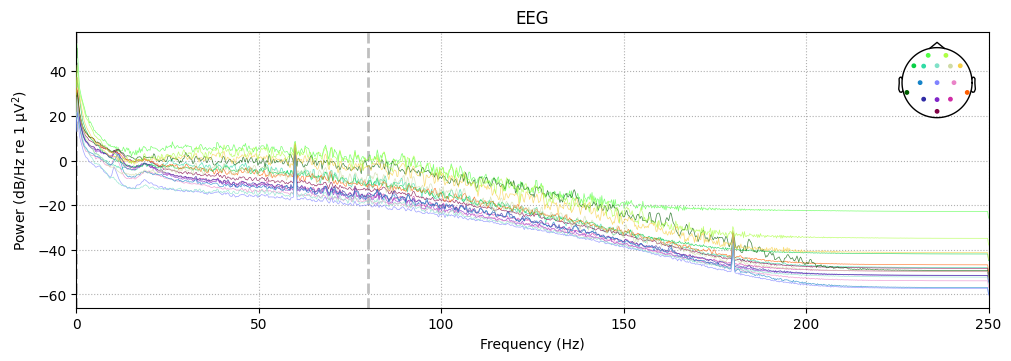

In [7]:
# calculate the PSD
psd = raw.compute_psd()

# plot the PSD
psd.plot();

## Plot the Frequency Spectrum of a Subset of the Raw Data

### Create a Subset of the Raw Data

We use the **`pick()`** method to select a specific subset of channels by their exact names.

In [8]:
# set selected channels by name
selected_channel_names = ["Pz", "P3", "P4"]

# create a subset of the raw data using pick() method
raw_subset = raw.copy().pick(picks=selected_channel_names)

### Plot the PSD for the Subset of the Raw Data

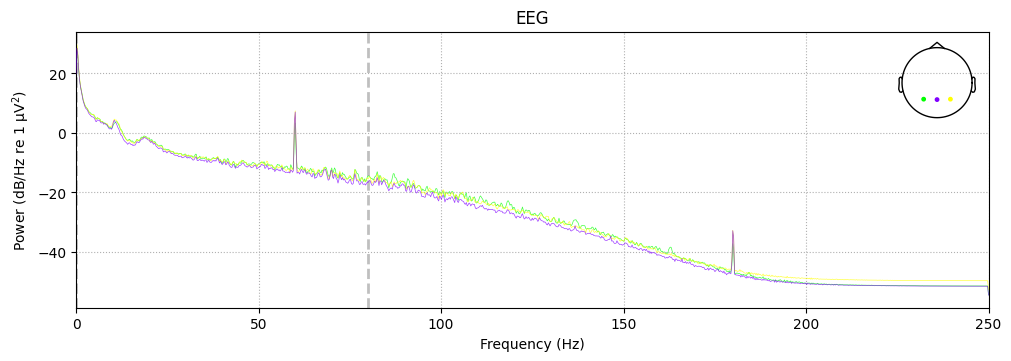

In [9]:
# calculate the PSD
psd = raw_subset.compute_psd()

# plot the PSD
psd.plot();

The PSD shows a clear spike at 60 Hz, which is the frequency of AC electrical service in the location where the data was recorded. This is an electromagnetic interference.

The PSD also shows a typical property of human EEG known as the 1 / f property That is, power is highest at the lowest frequencies, and drops off with increasing frequency. The dropoff is not linear (a diagonal line), but rather decreases at approximately 1 divided by the frequency.

## Filter the raw data

We use the **`filter()`** method to filter raw data.

We define a set of parameters for the filter command first, then run it.

The important (required) parameters are **`hi_cut`** and **`low_cut`**, and here we are specifying a bandpass filter with a low frequency (highpass) cutoff of 0.1 Hz, and a high frequency (lowpass) cutoff of 30 Hz.

In [10]:
# Filter settings
low_cut = 0.1
hi_cut  = 30

raw_subset_filtered = raw_subset.copy().filter(low_cut, hi_cut)

### Plot the Frequency Spectrum of the Filtered Data

We use the parameter **`fmax`** of the **`compute_psd()`** method to specify the frequency range.

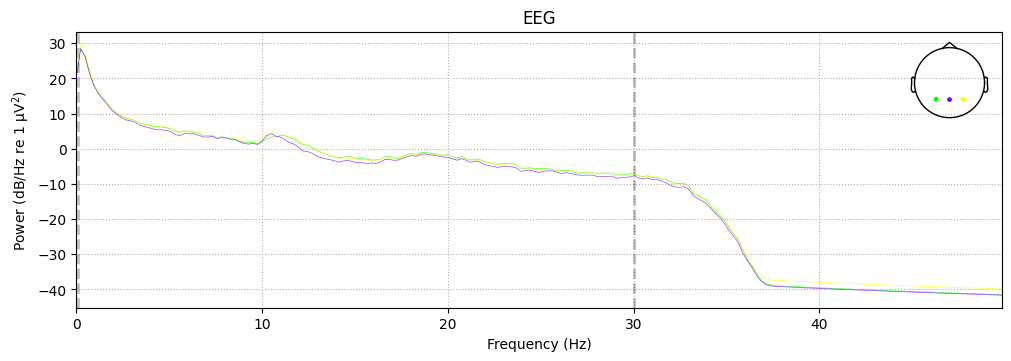

In [11]:
# calculate the PSD
# specify the frequency range, e.g., fmax=50 Hz
psd = raw_subset_filtered.compute_psd(fmax=50)

# plot the PSD
psd.plot();

The vertical dashed line shows the low-pass cutoff.

## Visualizing the effects of filtering in the time domain

### Unfiltered

The plot below shows the raw data.

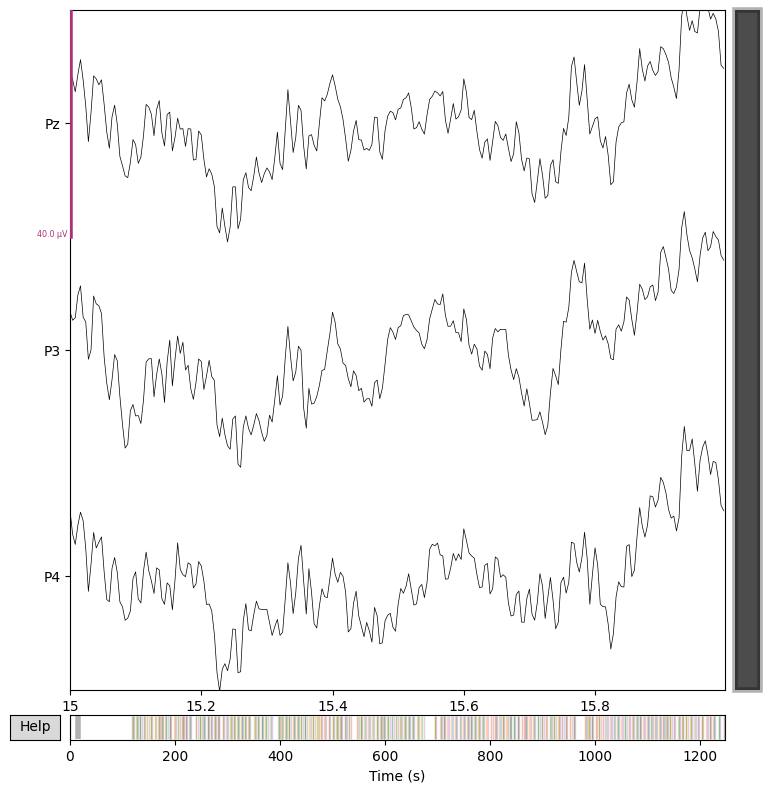

In [12]:
# define the time slice
start_time = 15.0  # start time in seconds
duration = 1.0   # duration to plot in seconds

# plot the data
raw_subset.plot(start=start_time, duration=duration)
plt.show()

### Filtered

The plot below shows the same sample of data after filtering.
We can see that the high frequency noise is gone.

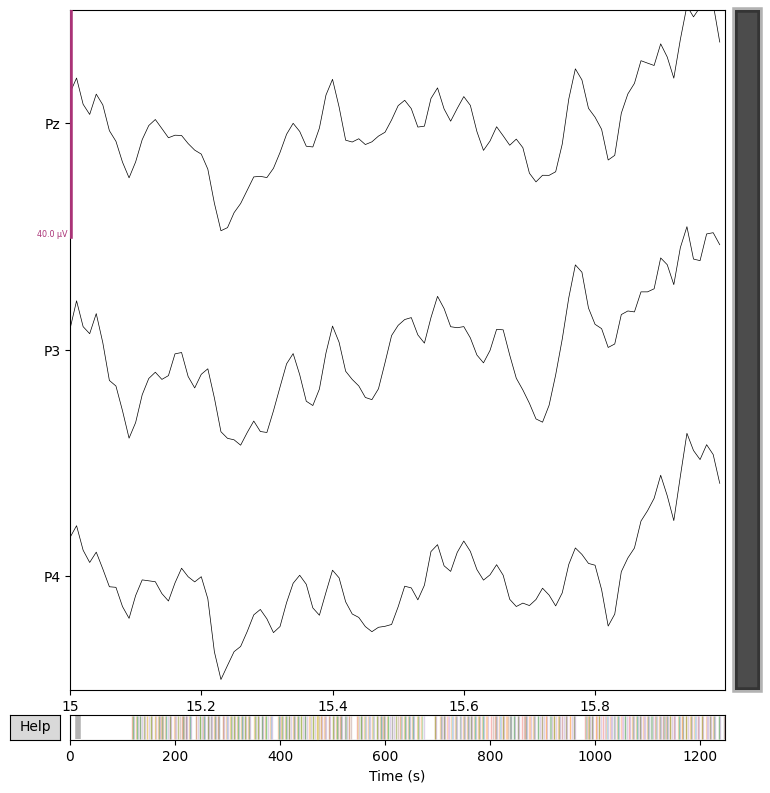

In [13]:
# plot the data
raw_subset_filtered.plot(start=start_time, duration=duration)
plt.show()

## Save Filtered Data

MNE data types all have a **`save()`** method that allows you to save them to files.

MNE uses a file format called **`.fif`**.

In [14]:
raw_subset_filtered.save('raw_subset_filtered.fif', overwrite=True)

[PosixPath('/content/raw_subset_filtered.fif')]